<a href="https://colab.research.google.com/github/pedr19faria/Pred-Prey/blob/main/ABM_PredatorPrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Agent-Based Predator Prey Model**
Agent-Based Models (ABM) are stochastic simulations that study the interaction of multiple agents in determined spaces and in time, where agents have a certain set of rules that they have to follow in order to interact with one another - this kind of model is built from the bottom up- and as they interact complex phenomena can emerge, giving an insight in real-world dynamics. In the case of this code I try to develop an ABM that exhibits a similar behaviour as the one seen using differential equations to describe Predator-Prey interaction (Lotka-Volterra Equations). So the question is: 'Does the stochastic model approach the analitical one?'. \
What the analitical model shows is that we can see oscilatory behaviour , where there are ciclical variations in the population of the prey and the predators. The interactions can be thought of as predators feeding off the prey, that in turn eats the grass, which grows 'everyday' (every timestep). If there are plenty of prey, the predators will have a good quantity of food, making it possible for them to eat and reproduce. As the predator population grows, however, the preys will start to decrease, but this fall means that there wont be enough food for the predator and their population will start to decline too.This decline means that the prey will have more chance to reproduce and they will grow. This then describes the cicle that happens between the two agents and is what can be seen in the graphs by the end of the code.

In [ ]:
import numpy as np
from numpy import random
import random
import copy as cp
import matplotlib.pyplot as plt
import PIL
from itertools import combinations

import matplotlib.colors as colors
plt.style.use('ggplot')
%matplotlib inline

**Starting Conditions:**

In [ ]:
N_prey = 40 # Population Prey
N_pred = 20 # Population Predator
height = 15
width = 15
energy_pred = 20 # Energy Predator
energy_prey = 5 # Energy Prey

In [ ]:

def initial_energy(N_pred, N_prey, E_pred, E_prey): # Number of prey and predators and their starting energies
    energy_pred = np.zeros(N_pred)
    energy_prey = np.zeros(N_prey)
    for i in range(N_pred):
        energy_pred[i] = E_pred

    for i in range(N_prey):
        energy_prey[i] = E_prey

    return energy_pred, energy_prey


# Random Position
def initial_position(height, width, N_pred, N_prey):
    # For predators:
    pos_pred = np.zeros((N_pred,2), dtype = int)
    for i in range(N_pred):
        pos_pred[i][0] = random.randint(0, width-1)
        pos_pred[i][1] = random.randint(0, height-1)
    # For prey
    pos_prey = np.zeros((N_prey, 2), dtype = int)
    for j in range(N_prey):
        pos_prey[j][0] = random.randint(0, width-1)
        pos_prey[j][1] = random.randint(0, height-1)


    return pos_pred, pos_prey

# Initial grass in the system, it is a number from 0 to 5
def initial_grass(height, width, k = 5):
    grass = np.random.random((width, height))*k

    return np.round(grass,1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def Create_Grid(w, h, pos_prey, pos_predator, amount_grass):
    def create_grid(width, height):
        grid = np.zeros((height, width, 3), dtype=int)
        return grid

    def place_agents(grid, agents):
        for agent in agents:
            y, x, agent_type = agent
            grid[y][x][agent_type] += 1

    def visualize_grid(grid, grass_amount):
        height, width, _ = grid.shape
        fig, ax = plt.subplots(figsize=(width + 1, height))

        # Define a colormap for grass ranging from brown to green
        cmap = colors.LinearSegmentedColormap.from_list(
            'grass_colormap', ['#8B4513', '#228B22'])

        # Normalize the grass_amount values to range from 0 to 1
        norm = colors.Normalize(vmin=0, vmax=np.max(grass_amount))

        # Plot the grid of squares
        for y in range(height):
            for x in range(width):
                agent_counts = grid[height - y - 1][x]
                grass_value = grass_amount[height - y - 1][x]

                # Determine the color of the grass based on its growth percentage
                grass_color = cmap(norm(grass_value))
                ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=grass_color))

                # Display the agent counts as white text in the center of each square
                text = f"{agent_counts[0]}, {agent_counts[1]}"
                ax.text(x + 0.5, y + 0.5, text, ha='center', va='center', color='white', weight='bold')

        # Create a color bar on the side
        cax = fig.add_axes([0.95, 0.1, 0.03, 0.8])
        cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax)
        cb.set_label('Grass Growth Percentage')

        # Add a legend below the color bar
        legend_text = f"Predator Count: {np.sum(grid[:, :, 1])}\nPrey Count: {np.sum(grid[:, :, 0])}"
        ax.text(width, -1., legend_text, ha='right', va='center', color='black', weight='bold')

        ax.set_xticks(np.arange(0, width, 1))
        ax.set_yticks(np.arange(0, height, 1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color='black', linewidth=1)
        plt.show()

    width = w
    height = h
    agents = []
    for j in range(len(pos_prey)):
        agents.append((pos_prey[j][0], pos_prey[j][1], 0))  # Prey
    for i in range(len(pos_predator)):
        agents.append((pos_predator[i][0], pos_predator[i][1], 1))  # Predator

    grid = create_grid(width, height)
    place_agents(grid, agents)
    visualize_grid(grid, amount_grass)





Now that the initial conditions of the system were established and how to represent it too we are going to put movement in it.

In [ ]:
def Nei(a,b, Columns_max, Rows_max): #a = rows, b = columns
    nei = [(a-1, b-1), (a-1, b), (a-1, b+1), (a+1, b-1),(a+1, b),(a+1, b+1),(a, b+1), (a, b-1), (a, b)]
    nei = [(c1,c2) for c1, c2 in nei if c1 < Columns_max and c2< Rows_max]
    nei = [(c1,c2) for c1, c2 in nei if c1 >= 0 and c2 >= 0]
    return nei
# By passing the position of the agent and the width and height of the grid, this function returns all their neighbours
#Example:
Nei(0,3,10,10)
# So the agents can move to these positions:

[(1, 2), (1, 3), (1, 4), (0, 4), (0, 2), (0, 3)]

#### Flowchart
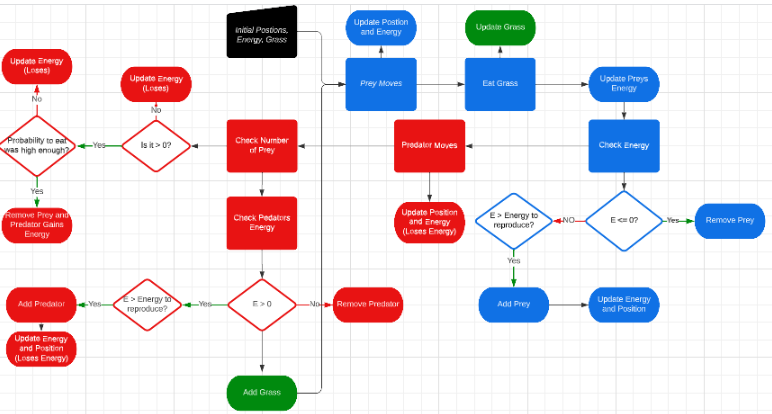
\
 Every timestep is considered to be a day

In [ ]:
### Prey
def add_prey(pos_prey, N_prey, width, height, eprey, E_prey = 4.):
    pos_new_prey = np.zeros((2), dtype = int)
    pos_new_prey[0] = random.randint(0, width -1)
    pos_new_prey[1] = random.randint(0, height - 1)
    pos_prey = np.append(pos_prey, [pos_new_prey], axis = 0)
    new_eprey = E_prey
    eprey = np.append(eprey, [new_eprey])


    return pos_prey, eprey


def move_prey(pos_prey, check_neig, width, height, eprey):

    Cost_Movement = 0.3
    for i in range(len(pos_prey)):
        neigb = check_neig(pos_prey[i][0], pos_prey[i][1], width, height)
        pos_prey[i] = random.choice(neigb)
        eprey[i] -= Cost_Movement

    return pos_prey, eprey


def eat_vegetable(pos_prey, grass, eprey):

    Gain_Eat = 0.8
    grass_copy = np.copy(grass)  # Make a copy of the grass array
    eprey_copy = np.copy(eprey)

    for i in range(len(pos_prey)):
        x, y = pos_prey[i]
        quant_total = grass_copy[x][y]

        quant_eaten = np.random.uniform(0.5, 1.) * quant_total

        grass_copy[x][y] -= quant_eaten

        eprey_copy[i] += quant_eaten*Gain_Eat

    return grass_copy, eprey_copy



def reproduction(eprey, pos_prey, function_to_reproduce, width, height, N_prey):
    const_energy_rep = 1. # How much energy you lose in order to reproduce
    e_min_rep = 5.
    prob_rep = 0.3
    indices = []
    for i in range(len(eprey)):
        if eprey[i] >= e_min_rep:
            if random.random() >= prob_rep:
                eprey[i] -= (1/3)*eprey[i]
                pos_prey, eprey = function_to_reproduce(pos_prey, N_prey, width, height, eprey, E_prey = 4.)

        elif eprey[i] <= 0:
            indices.append(i)
    pos_prey = np.delete(pos_prey, indices, axis= 0)
    eprey = np.delete(eprey, indices)
    N_prey = len(pos_prey)

    return N_prey, pos_prey, eprey



### With these functions we will have already changed the amount of grass in each square, the position of every prey
### their energy and MAYBE the total number of prey --> Very important



In [ ]:
### Predator
def add_pred(pos_pred, N_pred, width, height, epred, E_pred = 10.):
    pos_new_pred = np.zeros((2), dtype = int)
    pos_new_pred[0] = random.randint(0, width -1)
    pos_new_pred[1] = random.randint(0, height - 1)
    pos_pred = np.append(pos_pred, [pos_new_pred], axis = 0)
    new_epred = E_pred
    epred = np.append(epred,[new_epred])

    return pos_pred, epred


def move_predator(pos_pred, check_neig, width, height, epred):
    const_movimento = 0.3
    for i in range(len(epred)):
        neigb = check_neig(pos_pred[i][0], pos_pred[i][1], width, height)
        pos_pred[i] = random.choice(neigb)
        epred[i]  = epred[i] -  const_movimento

    return pos_pred, epred


def eat_prey(pos_pred, pos_prey, epred, eprey, N_prey):
    p_comer = 0.3
    energy_eat = 5.
    waste_energy_eat = 0.6
    energy_not_eat = 1.5

    for i in pos_pred:

        occupied = np.all(i == pos_prey, axis=1) # Boolean array, if PRedator and Prey are in the same spot, will be true
        # len(occupied) = Number of prey in the system
        if np.any(occupied) == True: # If any of these values are TRUE the prey and the predator are in the same position
            indice_prey = np.array(np.where(occupied)).astype(int).ravel() # Get all indexes that are TRUE
            ind_pred = np.array(np.where(np.all(pos_pred == i, axis = 1))).astype(int).ravel()
            ind_pred = random.choice(ind_pred)
            # Chooses the predator that is gonna eat
            quant_presa = len(indice_prey) # Number of prey in that position
            if random.random() >= p_comer/quant_presa:
                index_prey = random.choice(indice_prey)
                pos_prey = np.delete(pos_prey , [index_prey] ,axis = 0)
                eprey = np.delete(eprey, [index_prey], axis = 0)
                epred[ind_pred] = epred[ind_pred] +  energy_eat
                epred[ind_pred] = epred[ind_pred] - waste_energy_eat
            else:
                 epred[ind_pred] = epred[ind_pred] -  energy_not_eat
        else:
            ind_pred = np.array(np.where(np.all(pos_pred == i, axis = 1))).astype(int).ravel()
            ind_pred = random.choice(ind_pred)
            epred[ind_pred] = epred[ind_pred] -  energy_not_eat

    N_prey = len(pos_prey)


    return N_prey, pos_prey, eprey, epred


def check_energy_predator(pos_pred, N_pred, width, height, epred, function_to_reproduce):
    e_min_rep = 16
    prob_rep = 0.4
    indices = []
    for i in range(len(pos_pred)):

        if epred[i] >= e_min_rep:
            if random.random() >= prob_rep:
                epred[i] = epred[i] - (1/2)*(epred[i])
                pos_pred, epred = function_to_reproduce(pos_pred, N_pred, width, height, epred, E_pred = 10.)


        if epred[i] <= 0.:
            # DEAD
            indices.append(i)


    pos_pred = np.delete(pos_pred, indices, axis= 0)
    epred = np.delete(epred, indices)
    N_pred = len(pos_pred)


    return pos_pred, epred, N_pred






In [ ]:
# Plot
def predator_prey(N_predator,total_predator, N_prey, total_prey):
    total_prey.append(N_prey)
    total_predator.append(N_predator)

    return total_predator, total_prey

def average_grass(grass, avg):
    avg_grass = np.mean(grass)
    avg.append(avg_grass)

    return avg

In [ ]:
# Grow grass
def grow_grass(grass, width, height):
    K_grass = 1
    for i in range(width):
        for j in range(height):

            grass[i][j] = grass[i][j] + K_grass
    return grass

In [ ]:
def Movement(tfinal,predator_prey, move_prey, eat_vegetable, reproduction, move_predator, eat_prey, check_energy_predator, grow_grass, N_pred, N_prey, width, height, epred,eprey, add_prey, add_pred, check_neig, pos_prey, pos_pred, grass):
    t0 = 0
    total_prey = []
    total_pred = []
    avg = []
    predator_display = []
    prey_display = []
    grass_display = []

    while t0 < tfinal:
        i = t0
        Total_Grass = average_grass(grass, avg)
        Final_Total_Predator, Final_Total_Prey = predator_prey(N_pred, total_pred, N_prey, total_prey)

        # Prey

        pos_prey, eprey = move_prey(pos_prey, check_neig, width, height, eprey)

        grass, eprey = eat_vegetable(pos_prey, grass, eprey)
        N_prey , pos_prey, eprey = reproduction(eprey, pos_prey, add_prey, width, height, N_prey)
        ### The functions above represent the actions of the Prey and its interaction with the grass
        # Predator

        pos_pred, epred = move_predator(pos_pred, check_neig, width, height, epred)

        N_prey, pos_prey, eprey, epred = eat_prey(pos_pred, pos_prey, epred, eprey, N_prey)

        pos_pred, epred, N_pred = check_energy_predator(pos_pred, N_pred, width, height, epred, add_pred)


        # Grass

        grass = grow_grass(grass, width, height)

        predator_display.append(pos_pred)
        prey_display.append(pos_prey)
        grass_display.append(grass)


        t0+=1


    return Final_Total_Predator, Final_Total_Prey, Total_Grass, pos_prey, pos_pred, grass, predator_display, prey_display, grass_display







In [ ]:
N_prey = 40 # Population Prey
N_pred = 20 # Population Predator
height = 15
width = 15
energy_pred = 20 # Energy Predator
energy_prey = 5 # Energy Prey

In [ ]:
grass = initial_grass(height,width)
epred, eprey = initial_energy(N_pred, N_prey, energy_pred, energy_prey)
pp, pn= initial_position(width,height,N_pred,N_prey)

The grid below is a visual representation of whats happening in the system. Each box represents a position in which predators and prey can occupy and they all have a certain quantity of grass- The distribution is random, as shown in *initial_grass* function- and they all show how many preys and predators occupies each box and the color represents the percentage of grass in each box. The greener the box the more grass it has.


Each box shows: [Prey, Predator]

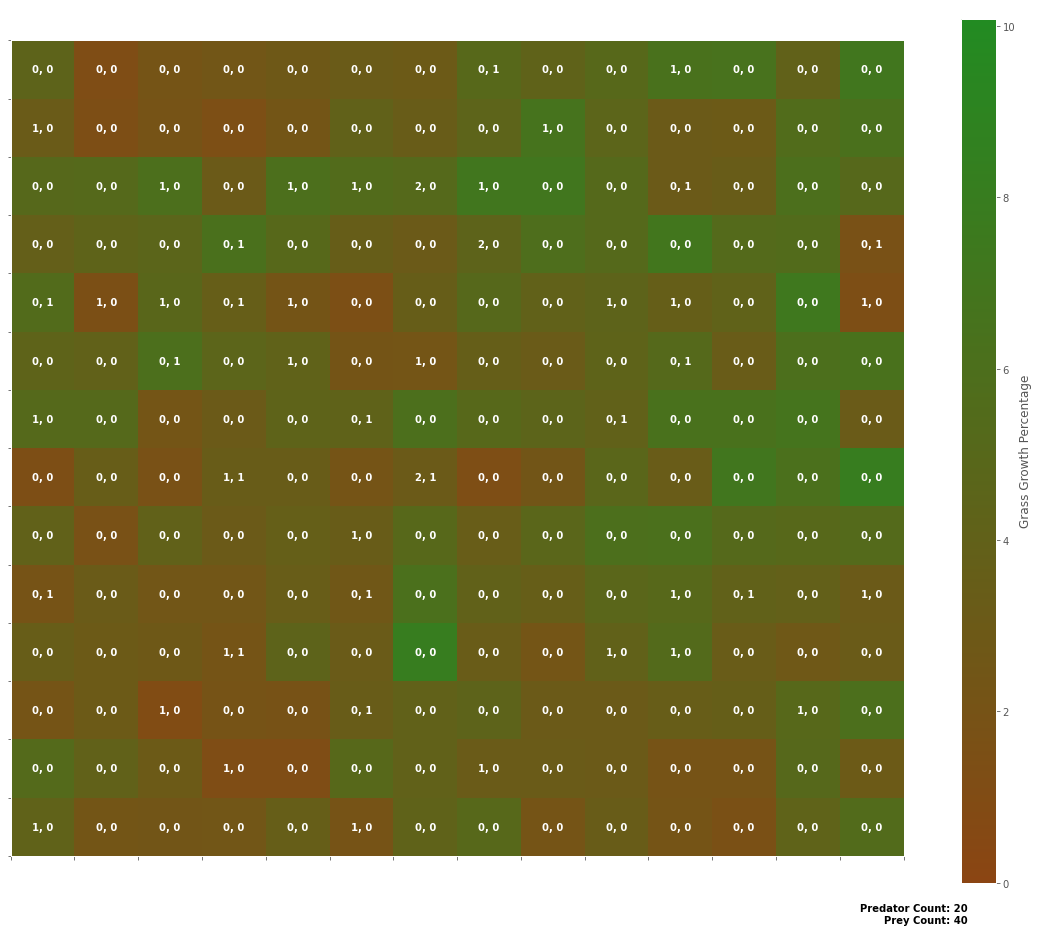

In [ ]:
Create_Grid(height,width,pn, pp, grass)
# initial position

In [ ]:
tfinal = 250

In [ ]:
total_pred, total_prey, total_grass,pos_prey, pos_pred, grass, predator_display, prey_display, grass_display = Movement(tfinal,predator_prey, move_prey, eat_vegetable, reproduction, move_predator, eat_prey, check_energy_predator, grow_grass, N_pred, N_prey, width, height, epred,eprey, add_prey, add_pred,Nei, pn, pp, grass)


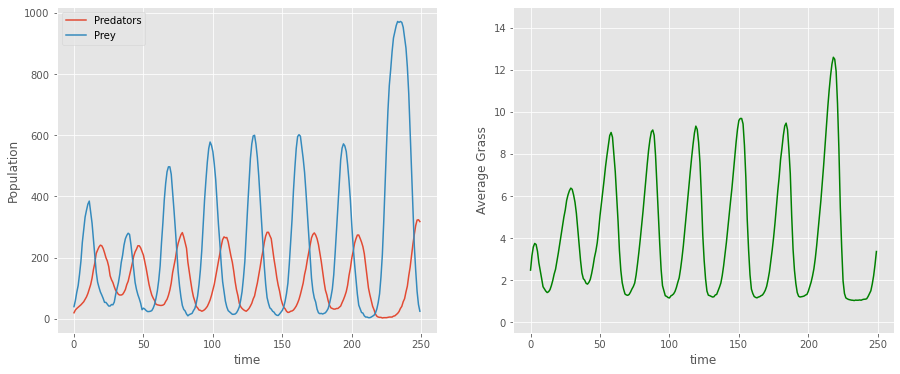

In [ ]:
fig, (ax,ax1)= plt.subplots(1,2, figsize = (15,6))
ax.plot(total_pred, label = 'Predators')
ax.plot(total_prey, label = 'Prey')
ax1.plot(total_grass, label = 'Grass', c= 'green')
ax1.set_xlabel('time')
ax1.set_ylabel('Average Grass')
ax1.set_ylim(-0.5, 15)
ax.set_xlabel('time')
ax.set_ylabel('Population')

ax.legend()
plt.show()


 The graphs display the strong similarities between what can be seen when we study the Lotka-Volterra equations using numerical methods, since the oscillatory behaviour is present in both of these analysis. The phase space shown below also comes close to what was seen in the numerical simulation

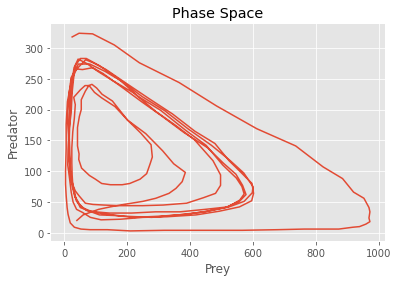

In [ ]:
plt.plot(total_prey, total_pred)
plt.title('Phase Space')
plt.xlabel('Prey')
plt.ylabel('Predator')
plt.show()

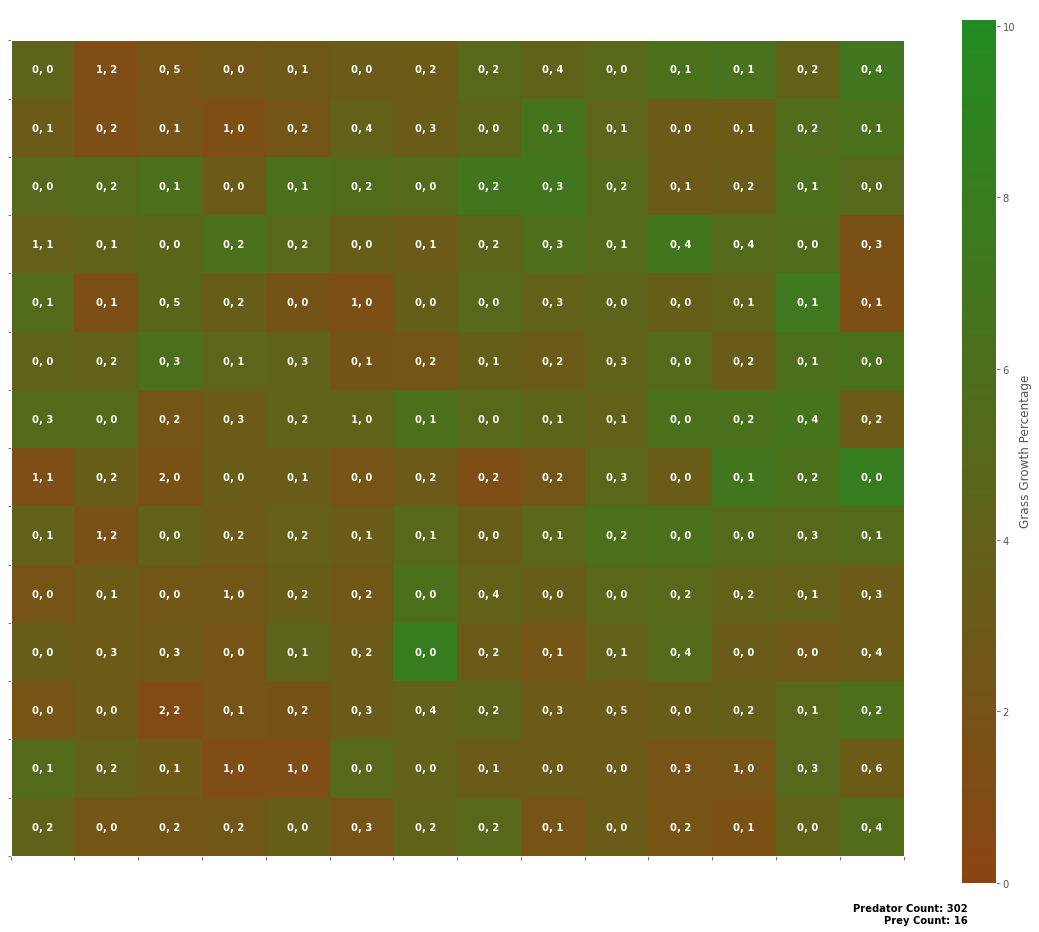

In [ ]:
Create_Grid(height,width,pos_prey, pos_pred, grass)
# Final position

The GIF below shows the 2D grid in each timestep. It makes it easy to visualize the oscillatory behaviour seen on the graph.

![Prey_Predator.gif](attachment:Prey_Predator.gif)